We use following test case for knapsack algorithms:

In [6]:
#!/usr/bin/python
# author: Xiheng He

import matplotlib.pyplot as plt

value = [60, 10, 20, 100, 50, 30, 40, 80, 70, 90]
weight = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
capacity = 300

Greddy algorithm for knapsack:
$cost$, $weight$, $capacity$ will input as list type, $n$ is int type refer to the number of items.

In [7]:
def greddy(cost, weight, capacity, n):
    res = [0 for _ in range(n)]
    ratio = [cost[i] / weight[i] for i in range(len(cost))]
    ratio.sort(reverse = True)
    for i in range(n):
        if weight[i] > capacity:
            res[i] = 0
        else:
            res[i] = 1
            capacity -= weight[i]
    return sum([i * j for i, j in zip(res, cost)])

Optimal algorithm $(FTPAS)$ for knapsack where $\epsilon$ must be positive:

In [8]:
def fptas(cost, weight, capacity, epsilon, n):
    if epsilon <= 0:
        print("epsilon must be greater than 0")
    else:
        cost_adj = cost.copy()
        k = epsilon * max(cost) / n
        for i in range(len(cost)):
            cost_adj[i] = int(cost[i] / k)
        res = [[0 for j in range(capacity + 1)] for j in range(n + 1)]
        for p in range(n + 1):
            for q in range(capacity + 1):
                if p == 0 or q == 0:
                    res[p][q] = 0
                elif weight[p - 1] <= q:
                    res[p][q] = max(res[p - 1][q], cost_adj[p - 1] + res[p - 1][q - weight[p - 1]])
                else:
                    res[p][q] = res[p - 1][q]
        return int(res[n][capacity] * k)

plot function for exercise B3, one is the comparison between the solution of two algorithms, the other is ratio against $|I|$:

In [9]:
def plot(value, weight, capacity, epsilon, n):
    res_greddy = [0 for _ in range(n)]
    res_ftpas = [0 for _ in range(n)]
    res_ratio = [0 for _ in range(n)]
    for i in range(n):
        res_greddy[i] = greddy(value, weight, capacity, i + 1)
        res_ftpas[i] = fptas(value, weight, capacity, epsilon, i + 1)
        res_ratio[i] = res_greddy[i] / res_ftpas[i]
    plt.figure()
    plt.plot(range(1, n + 1), res_greddy, label="Greedy")
    plt.plot(range(1, n + 1), res_ftpas, label="FPTAS")
    plt.xlabel("n")
    plt.ylabel("total value")
    plt.legend()
    plt.figure()
    plt.plot(range(1, n + 1), res_ratio, label="Ratio")
    plt.xlabel("n")
    plt.ylabel("ratio")
    plt.legend()
    plt.show()

plot using the testcase given above where $\epsilon$ was set to 0.5:

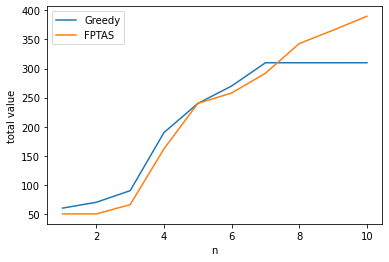

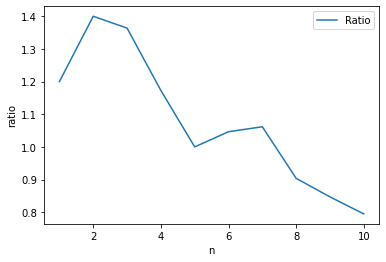

In [10]:
plot(value, weight, capacity, 0.5, 10)